In [ ]:
# Bryan Ochoa July 25 2023 bochoa@lbl.gov

# epics integration of piezo characterization
# using epics and bluesky and ophyd to poll position of the 
# interferometer at different frequencies

In [ ]:
from bluesky import RunEngine
import epics
from ophyd import EpicsSignal
from bluesky.plans import count
pico= 'CATERETE:PICOSCALE:'

In [ ]:
epics.cainfo(pico+"STREAM_STATUS")

In [ ]:
RE = RunEngine({})
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

In [ ]:
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

In [ ]:
from bluesky.utils import ProgressBarManager
RE.waiting_hook = ProgressBarManager()

In [ ]:
epics.caput(pico + "FRAMERATE", 152.58)
device = EpicsSignal("CATERETE:PICOSCALE:POS_2")
dets = [device]



Transient Scan ID: 5     Time: 2023-07-25 15:23:35
Persistent Unique Scan ID: 'e0c70ea3-08fa-48f7-8c1c-45f415938935'
New stream: 'primary'
+-----------+------------+--------------------------+
|   seq_num |       time | CATERETE:PICOSCALE:POS_2 |
+-----------+------------+--------------------------+
|         1 | 15:23:35.7 |                  -887958 |
|         2 | 15:23:35.7 |                  -888931 |
|         3 | 15:23:35.8 |                  -841476 |
|         4 | 15:23:35.8 |                  -877046 |
|         5 | 15:23:35.9 |                  -860112 |
|         6 | 15:23:35.9 |                  -901115 |
|         7 | 15:23:35.9 |                  -878902 |
|         8 | 15:23:36.0 |                  -819139 |
|         9 | 15:23:36.0 |                  -877284 |
|        10 | 15:23:36.0 |                  -900841 |
|        11 | 15:23:36.1 |                  -856232 |
|        12 | 15:23:36.1 |                  -812021 |
|        13 | 15:23:36.1 |                  -8926

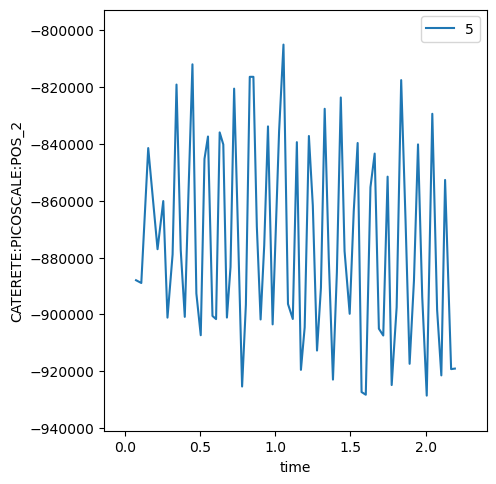

In [12]:
epics.caput('CATERETE:PICOSCALE:STREAM_START', 2)
RE(count(dets, num = 75))
epics.camonitor_clear('CATERETE:PICOSCALE:POS_2') 